Code generated to show how to use the Python library Seaborn.

This code demonstration section is divided into 4 Sections: 

• **Section 1:** Dataset overview

• **Section 2:** Platform & publisher insights

• **Section 3:** Critic/User score insights (filtered subsets)

• **Section 4:** Conclusions & Call of Duty

***Section 1 — Dataset Overview***

Data is available in Kaggle at https://www.kaggle.com/datasets/holmjason2/videogamedata?resource=download

**About Dataset** 

This data was created to try to answer the question "are video games getting worse?" There is a lot of talk about video games getting worse every year due to companies trying to maximize profits instead making quality games so I wanted to explore that idea.

**Content**

This data file contains over 19,000 games which includes games ranging from 1977 to the middle of 2020. Most of the data came from directly from the VGChartz database but some has been manually entered in from other sources. For example a lot of the critic and user scores were entered from information available on Metacritic.

Data was used mainly for visualization purposes.
The objective is to show how seaborn works, how it works with matplotlib, and derive insights from the data.

In [3]:
#pip install seaborn 

# Step 1: Import necessary libraries
import pandas as pd #necessary to read the CSV file
import seaborn as sns #visualizations
import matplotlib.pyplot as plt #formatting
import warnings #removes warning messages
warnings.filterwarnings('ignore')

# Step 2: Load the dataset
df = pd.read_csv("game_sales_data.csv", encoding="ISO-8859-1")
#CSV file isn’t encoded in standard UTF-8 (which is pandas’ default). Need to specify a different encoding when reading the file.

# Step 3: Display first 5 rows to confirm successful load
df.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017


In [4]:
# Basic info about columns, data types, and missing values
df.info()

# Overview of numeric columns
df.describe()

# View all column names
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           19600 non-null  int64  
 1   Name           19600 non-null  object 
 2   Platform       19600 non-null  object 
 3   Publisher      19600 non-null  object 
 4   Developer      19598 non-null  object 
 5   Critic_Score   9969 non-null   float64
 6   User_Score     2223 non-null   float64
 7   Total_Shipped  19600 non-null  float64
 8   Year           19600 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.3+ MB


Index(['Rank', 'Name', 'Platform', 'Publisher', 'Developer', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Year'],
      dtype='object')

In [5]:
#Get a count of how many rows have null values per column
df.isnull().sum()

Rank                 0
Name                 0
Platform             0
Publisher            0
Developer            2
Critic_Score      9631
User_Score       17377
Total_Shipped        0
Year                 0
dtype: int64

In [6]:
#check distributions

#df.describe(include='all')
df.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Year
count,19600.000000,9969.000000,2223.000000,19600.000000,19600.000000
mean,9798.539133,7.034848,6.994872,0.551123,2007.789949
std,5658.110539,1.558968,1.517038,1.671466,6.326169
min,1.000000,0.800000,1.000000,0.010000,1977.000000
25%,4898.750000,6.100000,6.300000,0.050000,2004.000000
50%,9798.500000,7.300000,7.200000,0.160000,2008.000000
75%,14698.250000,8.200000,8.000000,0.460000,2012.000000
max,19598.000000,10.000000,10.000000,82.900000,2020.000000


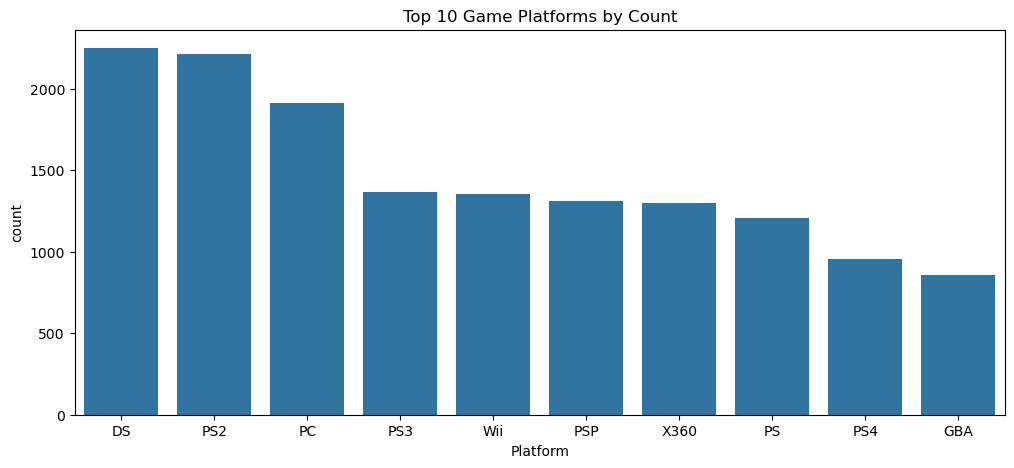

In [7]:
##Graph 1
# Example: top 10 genres by count

# Set the figure size (width=12 inches, height=5 inches)
plt.figure(figsize=(12, 5))

# Create a bar chart showing the count of games per platform 'order' ensures the platforms are sorted by number of games (top 10 only)
sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().index[:10])

#, palette = 'flare')

# Add a descriptive title to the graph
plt.title("Top 10 Game Platforms by Count")
#plt.xlabel("Platform")
#plt.ylabel("Number of Games")


# Rotate the platform labels on the x-axis for better readability -- not nececessary 
plt.xticks(rotation=0)


# Display the final plot
plt.show()

Seaborn Palette Library = https://seaborn.pydata.org/tutorial/color_palettes.html

**Graph Explanation**

sns (Seaborn) handles data visualization logic — it reads your DataFrame, applies statistical functions, and automatically makes the chart look clean (colors, grid, etc.).

plt (Matplotlib’s pyplot) handles fine-tuning and layout control — titles, axis labels, rotations, figure size, etc.

plt.figure(figsize=(12,5))   # Matplotlib – defines the figure size

sns.barplot(...)             # Seaborn – plots the chart

plt.title("My Title")        # Matplotlib – adds a title

plt.show()                   # Matplotlib – renders the plot

**Top 10 Game Platforms by Count**

The chart above shows the number of game titles released across the ten most common platforms in the dataset.
The Nintendo DS (DS) and PlayStation 2 (PS2) dominate the list, each with over 2,000 titles, followed closely by PC releases.
This reflects the long lifespans and broad game libraries of these platforms.
In contrast, newer systems like the PS4 appear lower on the list, likely because they had fewer total releases by the dataset’s cutoff year.

Overall, the distribution highlights how older, high-selling consoles such as the DS and PS2 were major hubs for game production during their respective generations.

***Section 2 — Platform & Publisher Insights***

Will focus on insights from platform and publisher

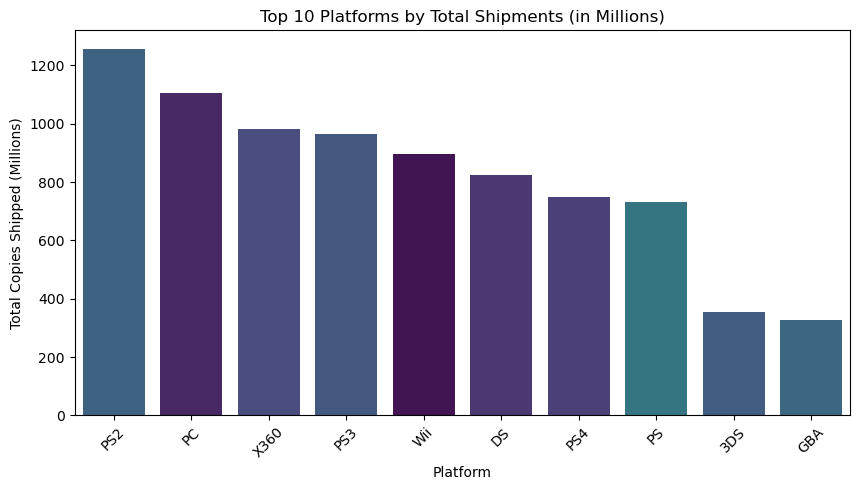

In [12]:
#Graph 2
#Total Shipment by Platform using matplotlib and seaborn

plt.figure(figsize=(10,5))
sns.barplot(
    data=df, 
    x='Platform', 
    y='Total_Shipped', 
    estimator='sum', 
    order=df.groupby('Platform')['Total_Shipped'].sum().sort_values(ascending=False).index[:10], 
    hue = 'Platform',
    errorbar=None,
    palette='viridis'
)
plt.title("Top 10 Platforms by Total Shipments (in Millions)")
plt.xlabel("Platform")
plt.ylabel("Total Copies Shipped (Millions)")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Publisher', ylabel='count'>

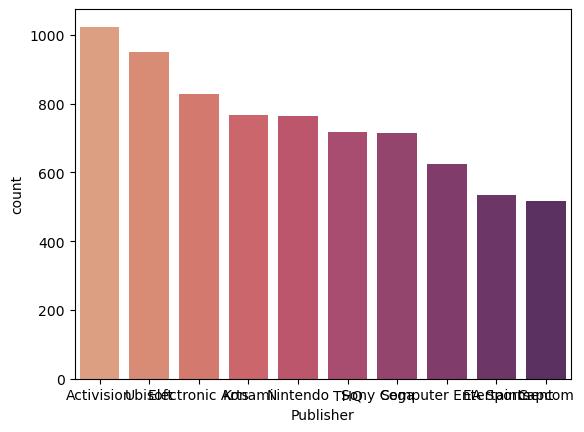

In [13]:
#Graph 3 - example that just using seaborn might not be the best option.
#Top 10 Publishers by Total Games Released 
#A bad example of Seaborn only

sns.countplot(data=df, x='Publisher', order=df['Publisher'].value_counts().index[:10], palette='flare')

Seaborn needs context and a bit of Matplotlib tuning for readability, otherwise, it defaults to small text, tight spacing, and no rotation handling for long labels.

This example illustrates that:

Even though Seaborn is visually cleaner, you sometimes still need to fine-tune with Matplotlib.

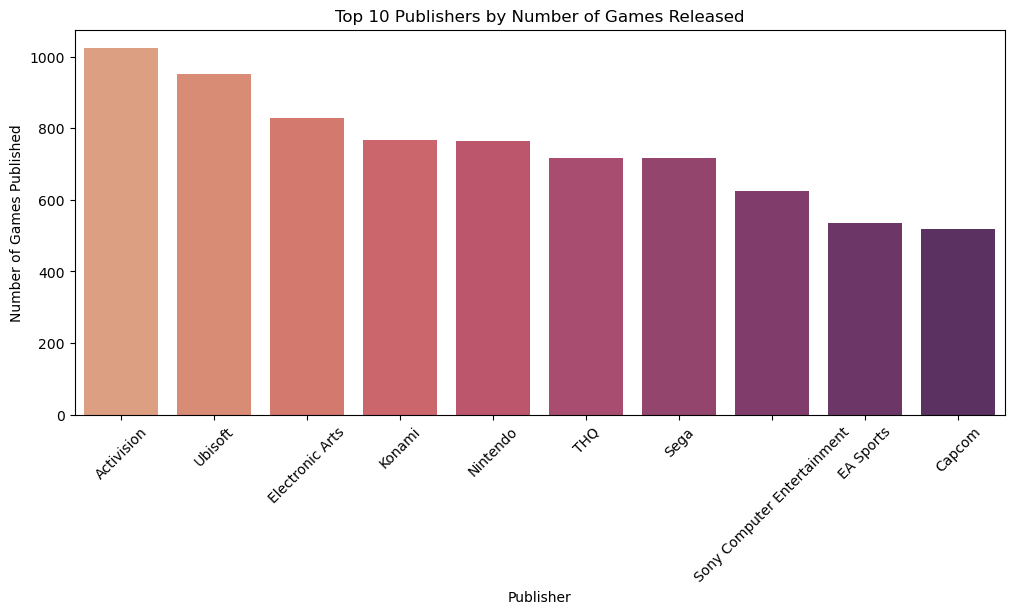

In [15]:
#Graph 4
#Top 10 Publishers by Total Games Released - fixing the graph above

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Publisher', order=df['Publisher'].value_counts().index[:10], palette='flare', legend = False) 
#hue = 'Publisher')
plt.title("Top 10 Publishers by Number of Games Released")
plt.xlabel("Publisher")
plt.ylabel("Number of Games Published")
plt.xticks(rotation=45)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------

<Figure size 800x500 with 0 Axes>

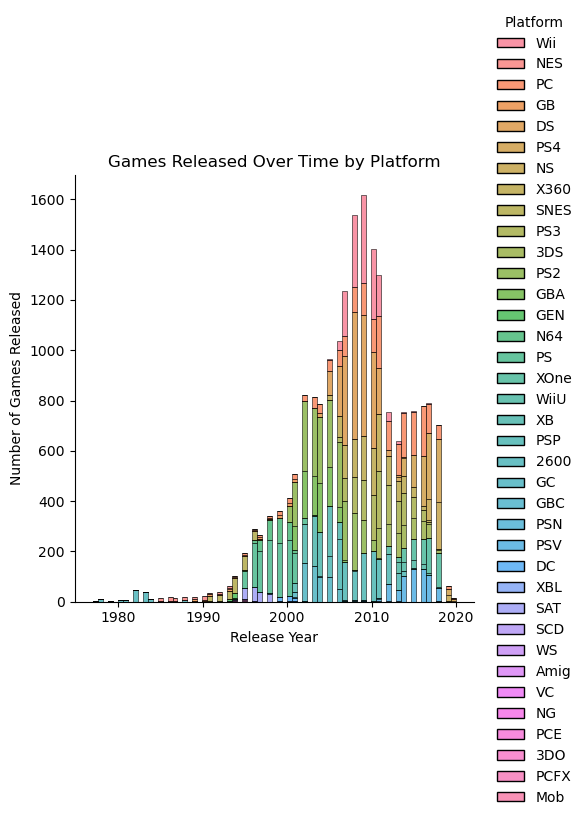

In [17]:
#Graph 5
#Games Released Over Time per Platform (Trend Plot) - issue


plt.figure(figsize=(8,5))
sns.displot(data=df, x='Year', hue='Platform', multiple='stack')
plt.title("Games Released Over Time by Platform")
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released")
plt.show()

Here I am using the full df data, which makes the graph looks messy. 

I would have to create a sub-dataset to graoh it with matplotlib. 

<Figure size 1500x600 with 0 Axes>

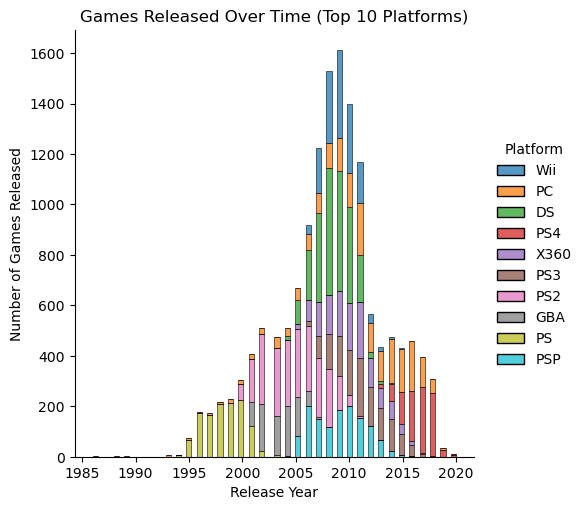

In [19]:
#Graph 5.1 - creating a subdataset to fix the issue but the size gets ignored by displot 

# Step 1: Identify top 10 platforms by number of games
top_platforms = df['Platform'].value_counts().head(10).index

# Step 2: Filter dataset
df_top = df[df['Platform'].isin(top_platforms)]

# Step 3: Plot using Matplotlib + Seaborn
plt.figure(figsize=(15, 6)) #size gets "ignored" by figure level functions (like displot, catplot, relplot, lmplot)
sns.displot(
    data=df_top,         # use filtered dataset
    x='Year',
    hue='Platform',
    multiple='stack',
    palette='tab10'
)
plt.title("Games Released Over Time (Top 10 Platforms)")
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released")
#plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

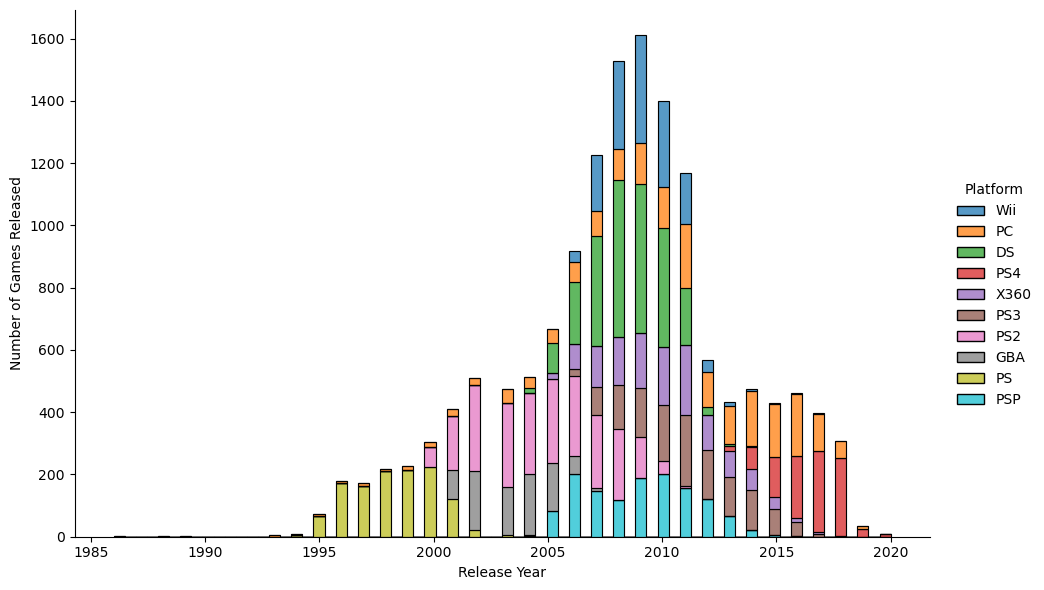

In [20]:
#Graph 5.2 - Fixing the size issue above with Seaborn displot by adding height and aspect
g = sns.displot(data=df_top, x="Year", hue="Platform", multiple="stack", palette="tab10", height=6, aspect=1.6)
g.set_axis_labels("Release Year", "Number of Games Released")
g._legend.set_title("Platform")

***Section 3 — Critic & User Score Insights***

create df_critic and df_user

The main dataset (df) has a lot of missing score values:

• +-50% missing in Critic_Score

• +-90% missing in User_Score

If I use the full dataset for plots involving those columns, Seaborn will automatically drop rows with missing data. That can make plots inconsistent (since the underlying data subset changes from plot to plot).

By creating df_critic and df_user:

• Get clean, stable subsets that always contain valid scores.

• Can reliably explore relationships like Critic_Score vs Total_Shipped or score distributions.

• Can clearly communicate sample size differences (e.g., “Critic_Score has 9,969 rows, while User_Score has 2,223”).

In [22]:
# Filtered datasets for scores
df_critic = df.dropna(subset=['Critic_Score'])
df_user = df.dropna(subset=['User_Score'])

In [23]:
print("Rows with critic scores:", len(df_critic))
print("Rows with user scores:", len(df_user))

Rows with critic scores: 9969
Rows with user scores: 2223


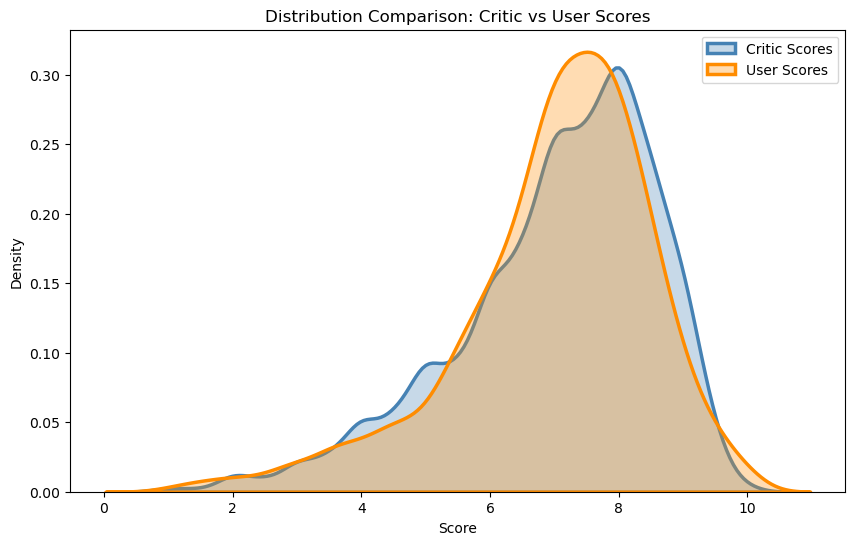

In [24]:
#Graph 6
plt.figure(figsize=(10, 6))

sns.kdeplot(df_critic['Critic_Score'], color='steelblue', 
            label='Critic Scores', linewidth=2.5, fill=True, alpha=0.3)
sns.kdeplot(df_user['User_Score'], color='darkorange', 
            label='User Scores', linewidth=2.5, fill=True, alpha=0.3)

plt.title("Distribution Comparison: Critic vs User Scores")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.show()

**Explaining Density**:
The y-axis shows density rather than raw counts. Density is a statistical measure where the total area under each curve equals 1, which allows us to fairly compare the shapes of distributions even when we have different sample sizes. This is the standard approach in data science when comparing groups with unequal numbers of observations.

**Interpretation**
Looking at this comparison, we can see that both critics and users tend to rate games similarly, with most scores clustering around 7-8 out of 10. However, notice that the user score distribution (orange) is slightly wider and peaks a bit lower than the critic scores (blue), suggesting users are somewhat more varied in their opinions and slightly more critical on average. The critic scores are more tightly concentrated, which makes sense since professional critics use more consistent rating criteria

**Why This Matters**:
We had about 10,000 critic scores but only 2,200 user scores in our dataset. If we plotted raw counts, the critic histogram would dwarf the user histogram, making it nearly impossible to compare their shapes. Density normalization solves this problem and is the preferred method in data science for distribution comparisons.

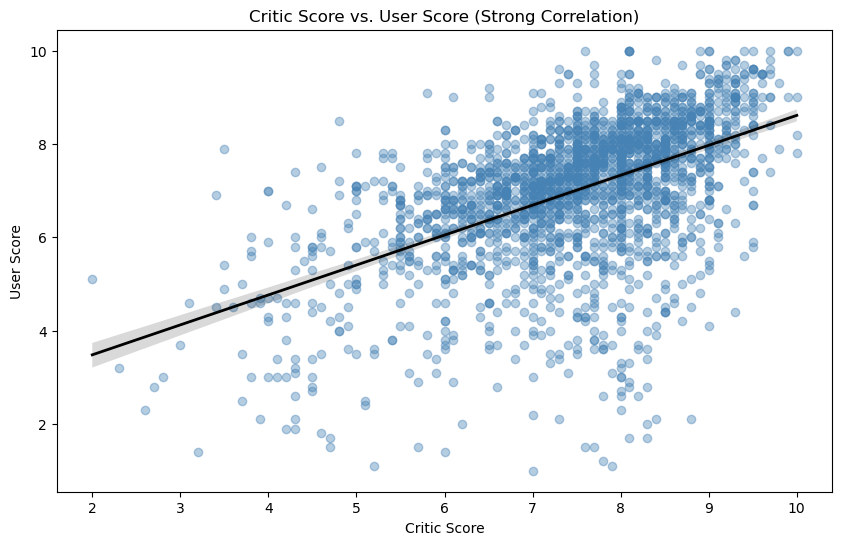

In [26]:
# Graph 7
# Filter to games with BOTH scores
both_scores = df[(df['Critic_Score'].notna()) & (df['User_Score'].notna())]

plt.figure(figsize=(10, 6))
sns.regplot(data=both_scores, x='Critic_Score', y='User_Score',
            scatter_kws={'alpha': 0.4, 'color': 'steelblue'},
            line_kws={'color': 'black', 'linewidth': 2})
plt.title("Critic Score vs. User Score (Strong Correlation)")
plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.show()

regplot combines a scatterplot with a regression line and confidence interval. Each point is a game with both scores.

The positive slope shows correlation - when critics like a game, users tend to as well. The r value we saw in the heatmap was 0.52, which is moderate positive correlation.

The gray shaded area is the confidence interval - showing the uncertainty in our regression line. It's narrow here because we have lots of data points.

This is one line of code in Seaborn. In matplotlib alone, you'd need scipy for the regression, manual plotting, and separate confidence interval calculations."

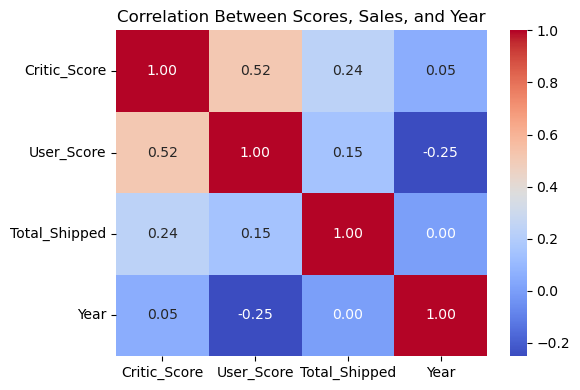

In [30]:
# Graph 9
# Cleaner Correlation Heatmap

# Create a new figure and set its size
plt.figure(figsize=(6,4))

# Generate a heatmap to show correlation between selected columns
sns.heatmap(
    df_critic[['Critic_Score','User_Score','Total_Shipped','Year']].corr(),  # compute correlation matrix for selected columns
    annot=True,        # display correlation values inside the cells
    cmap='coolwarm',   # use the 'coolwarm' color palette (red = positive, blue = negative)
    fmt=".2f"          # format correlation values with 2 decimal places
)

# Add a descriptive title for the plot
plt.title("Correlation Between Scores, Sales, and Year")

# Adjust layout to prevent overlaps
plt.tight_layout()

# Display the heatmap
plt.show()

The correlation heatmap quantifies how key variables relate to one another.

There’s a moderate positive correlation (0.52) between Critic_Score and User_Score, showing that critics and players generally agree, though not perfectly.

Total_Shipped has a weak positive correlation with critic scores, suggesting that while higher-rated games often sell well, sales are also driven by other factors like marketing and brand recognition.

The weak relationship between Year and the other variables indicates that average scores and sales levels have remained relatively stable over time.

In [32]:
#Analysis - Games Shipped

# Drop missing values in Total_Shipped
df_shipped = df.dropna(subset=['Total_Shipped'])

# Sort by total shipped (descending) and show top 10
top10_shipped = df_shipped.sort_values(by='Total_Shipped', ascending=False).head(10)

# Display key info
top10_shipped[['Name', 'Platform', 'Publisher', 'Total_Shipped', 'Critic_Score', 'User_Score']]

,Name,Platform,Publisher,Total_Shipped,Critic_Score,User_Score
0,Wii Sports,Wii,Nintendo,82.90,7.7,8.0
1,Super Mario Bros.,NES,Nintendo,40.24,10.0,8.2
2,Counter-Strike: Global Offensive,PC,Valve,40.00,8.0,7.5
3,Mario Kart Wii,Wii,Nintendo,37.32,8.2,9.1
4,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,36.60,8.6,4.7
5,Minecraft,PC,Mojang,33.15,10.0,7.8
6,Wii Sports Resort,Wii,Nintendo,33.13,8.0,8.8
7,Pokemon Red / Green / Blue Version,GB,Nintendo,31.38,9.4,8.8
8,New Super Mario Bros.,DS,Nintendo,30.80,9.1,8.1
9,New Super Mario Bros. Wii,Wii,Nintendo,30.30,8.6,9.2


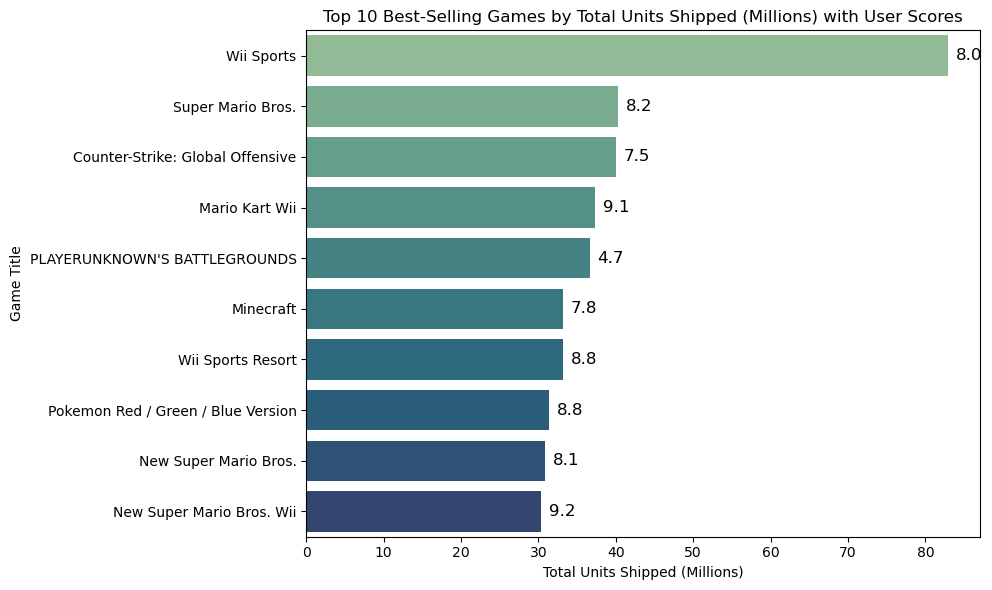

In [34]:
#Graph 10
#Top 10 Best-Selling Games by Total Units Shipped (Millions) with User Scores

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top10_shipped,
    y='Name', #puts titles in the y-axis
    x='Total_Shipped',
    palette='crest'
)

plt.title("Top 10 Best-Selling Games by Total Units Shipped (Millions) with User Scores")
plt.xlabel("Total Units Shipped (Millions)")
plt.ylabel("Game Title")

# Add user score labels to the end of each bar
for i, (value, score) in enumerate(zip(top10_shipped['Total_Shipped'], top10_shipped['User_Score'])):
    ax.text(value + 1, i, f"{score:.1f}", va='center', fontsize=12, color='black')


ax.tick_params(axis='y', labelsize=10)  # Decrease y-axis (game titles) font size

plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Wii'),
  Text(1, 0, 'PC'),
  Text(2, 0, 'PS4'),
  Text(3, 0, 'NS'),
  Text(4, 0, 'PS3'),
  Text(5, 0, '3DS'),
  Text(6, 0, 'X360'),
  Text(7, 0, 'XOne'),
  Text(8, 0, 'WiiU'),
  Text(9, 0, 'PSV')])

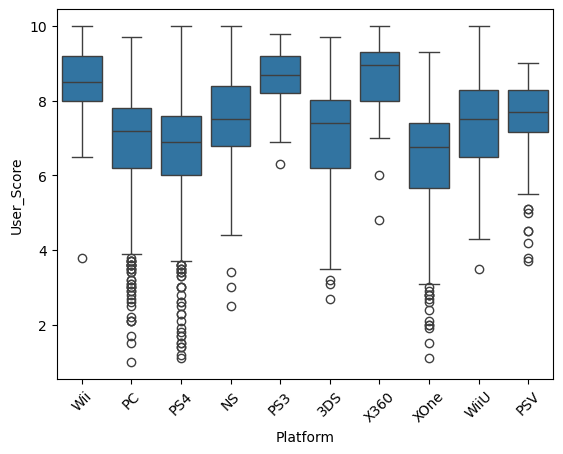

In [36]:
#Graph 11

#User Scores by Top Platform

top_plat = df_user['Platform'].value_counts().head(10).index
sns.boxplot(data=df_user[df_user['Platform'].isin(top_plat)],
            x='Platform', y='User_Score')
plt.xticks(rotation=45)

**Boxplot explanation**

Looking specifically at PC games in the boxplot:

• The median user score (the horizontal line inside the blue box) is around 7, meaning half of all PC games score below 7 and half above.

• The blue box itself spans roughly from 6 to 8, showing that most PC games fall within that middle 50% range — scores between 6 and 8 are very common.

• The whiskers extend from about 4 up to 9.5, capturing most of the “normal” scores in the dataset.

• The many small circles below the box represent outliers — PC games that received unusually low ratings (between 0 and 4). This indicates a wider variation in player satisfaction on PC compared to some other platforms.

**Summary**

PC games show a more diverse spread of user ratings than most consoles. While many titles are well-received (scores near 8 or 9), there’s also a significant number of poorly rated games — reflecting the PC platform’s broad range of both high-quality and low-quality releases.

**Section 4 - Conclusion & Call of Duty Analysis** 


**Dataset Overview:** The dataset covers roughly 19,600 games across multiple platforms, with varying data completeness for critic and user scores.

**Platform Insights:** Platforms like DS, PS2, and PC host the largest game libraries, but user ratings suggest modern systems such as PS4 and Wii maintain more consistent quality.

**Publisher Insights:** Certain publishers (e.g., Nintendo, Valve, and Blizzard) achieve higher average user ratings, showing consistent player satisfaction.

**Score Insights:**  The distribution of critic and user scores shows both groups generally positive but not perfectly aligned. Critics are slightly more consistent, while users express greater variability.

**Correlations:** The moderate critic–user score correlation suggests general agreement in quality perception, and the weak link between reviews and sales confirms that success depends on more than just ratings: branding, nostalgia, and accessibility also play key roles.

**Final Takeaway:**
Games with both strong critical reception and positive user feedback generally perform better commercially, but standout hits can also emerge from well-known franchises regardless of score.
Seaborn’s visualizations effectively highlight how perception, platform, and publisher strategy intertwine to shape game success.

------------------------------------------------**Specific Example if time allows**--------------------------------------------------------

In [57]:
#Specific Example: Call of Duty

# Filter all rows that contain 'Call of Duty' in the Name column (case-insensitive)
cod_df = df[df['Name'].str.contains('Call of Duty', case=False, na=False)]

# Preview
cod_df[['Name', 'Platform', 'Year', 'Critic_Score', 'User_Score', 'Total_Shipped']].sort_values('Year')

,Name,Platform,Year,Critic_Score,User_Score,Total_Shipped
19531,Call of Duty,PC,2003,7.0,NaN,0.01
5547,Call of Duty: Finest Hour,GC,2004,7.7,NaN,0.40
1947,Call of Duty: Finest Hour,XB,2004,7.3,NaN,1.21
627,Call of Duty: Finest Hour,PS2,2004,NaN,NaN,2.89
704,Call of Duty 2: Big Red One,PS2,2005,8.5,NaN,2.67
...,...,...,...,...,...,...
111,Call of Duty: Black Ops IIII,PS4,2018,8.3,4.0,9.32
8764,Call of Duty: Modern Warfare Remastered,PC,2018,NaN,NaN,0.19
283,Call of Duty: Black Ops IIII,XOne,2018,NaN,NaN,4.85
10738,Call of Duty: Black Ops IIII,PC,2018,NaN,NaN,0.13


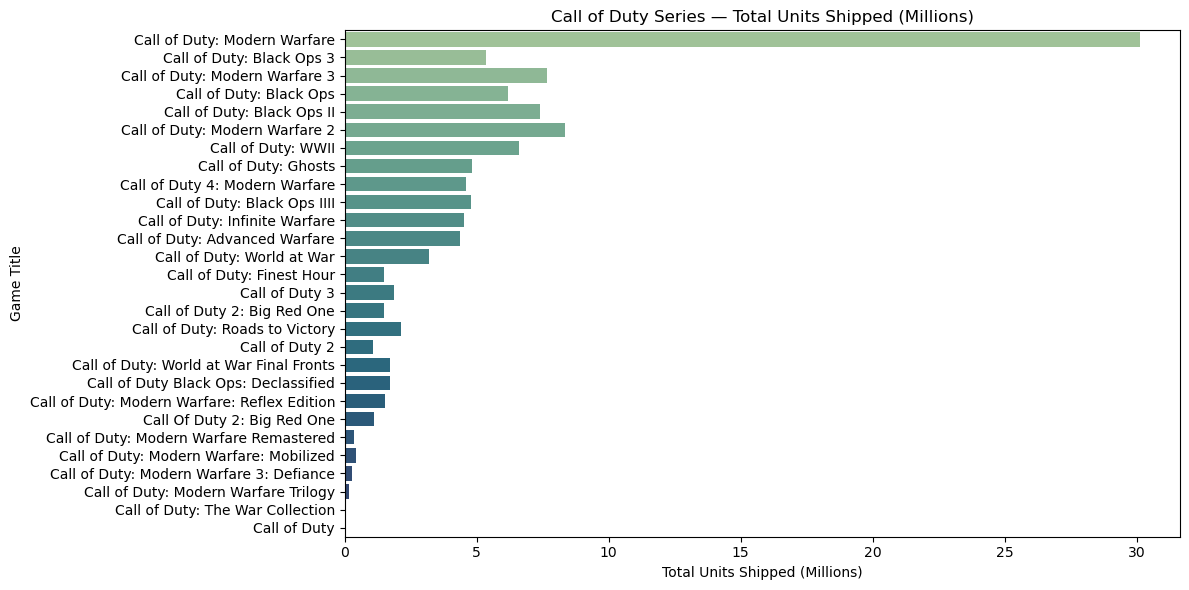

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=cod_df.sort_values('Total_Shipped', ascending=False),
    y='Name',
    x='Total_Shipped',
    palette='crest',
    errorbar=None
)
plt.title("Call of Duty Series — Total Units Shipped (Millions)")
plt.xlabel("Total Units Shipped (Millions)")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

**Call of Duty Series — Sales Performance**

This horizontal bar chart ranks Call of Duty games by total units shipped (in millions). Modern Warfare (2019) leads with over 30 million copies shipped, followed by Black Ops titles from various years.

The **black lines on each bar** represent confidence intervals (error bars) — Seaborn's default way of showing uncertainty when aggregating data. In this case, since some game titles appear across multiple platforms in our dataset, the bars show the aggregated total while the error bars indicate the statistical spread. To remove these and show clean bars, you can add `errorbar=None` to the barplot parameters.

The visualization demonstrates how the franchise has maintained strong sales performance over time, with recent titles (2017-2019) achieving the highest commercial success.

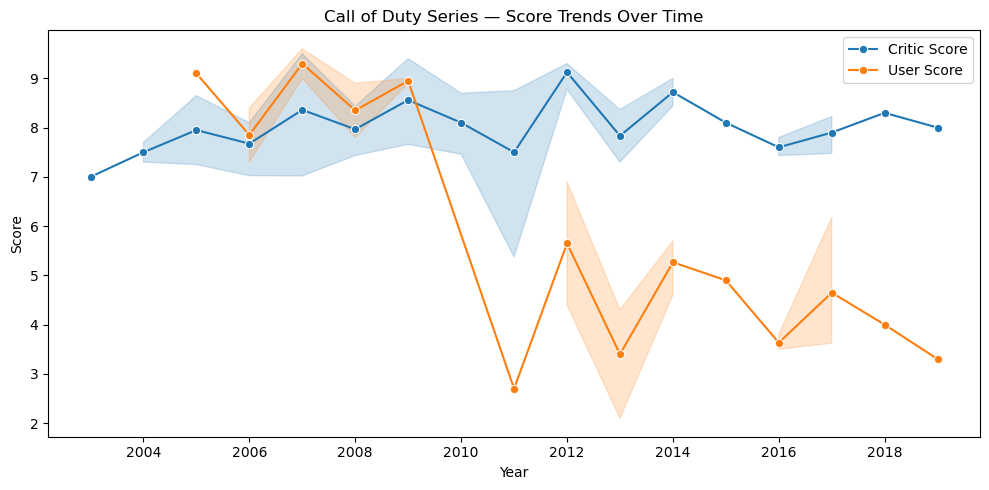

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(data=cod_df, x='Year', y='Critic_Score', label='Critic Score', marker='o')
sns.lineplot(data=cod_df, x='Year', y='User_Score', label='User Score', marker='o')
plt.title("Call of Duty Series — Score Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

**Call of Duty Series — Quality Perception Over Time**

This line plot tracks how critic and user scores for Call of Duty games have evolved from 2003 to 2019. The two lines represent professional critic scores (scaled 0-10) and user scores respectively.

The **shaded areas around each line** are confidence interval bands, which Seaborn automatically adds to line plots to show the variability or uncertainty in the data at each time point. When multiple games are released in the same year, the shaded area widens to reflect this spread in scores. To remove these bands for a cleaner look, add `errorbar=None` to the lineplot parameters.

Interestingly, we see that critic scores (blue) have remained relatively stable around 8/10, while user scores (orange) show more volatility — particularly a sharp decline after 2010, suggesting growing player dissatisfaction with recent franchise entries despite consistent critical reception.

Appendix

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip",hue="sex")